In [60]:
import pandas as pd


In [61]:
cbb = pd.read_csv('cbb_refined_2.csv')

In [62]:
cbb.head()

,TEAM,CONF,G,W,Offensive_Efficiency,Defensive_Efficiency,Power_Rating,EFG_O,EFG_D,Turnover_Rate,...,FreeThrowRate_Allowed,2P_O,2P_D,3P_O,3P_D,Tempo,WAB,SUCCESSFUL,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,1,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,1,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1,1.0,2017


In [147]:
cbb.SUCCESSFUL.mean()

0.1824847250509165

In [63]:
#Features to remove due to Identification purpose 
#TEAM, CONF, YEAR, G

In [64]:
cbb_cleaned = cbb.drop(['TEAM','CONF','YEAR','G'], axis = 1)

In [65]:
cbb_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   W                      2455 non-null   int64  
 1   Offensive_Efficiency   2455 non-null   float64
 2   Defensive_Efficiency   2455 non-null   float64
 3   Power_Rating           2455 non-null   float64
 4   EFG_O                  2455 non-null   float64
 5   EFG_D                  2455 non-null   float64
 6   Turnover_Rate          2455 non-null   float64
 7   Steal_Rate             2455 non-null   float64
 8   OffensiveRebound_Rate  2455 non-null   float64
 9   DefensiveRebound_Rate  2455 non-null   float64
 10  FreeThrowRate          2455 non-null   float64
 11  FreeThrowRate_Allowed  2455 non-null   float64
 12  2P_O                   2455 non-null   float64
 13  2P_D                   2455 non-null   float64
 14  3P_O                   2455 non-null   float64
 15  3P_D

In [66]:
# SEED, Power_Rating, W(Wins), and WAB(Wins above Bubble Teams) are not related to the play of the team they are features determined by the NCAA not the teams play from game to game
# Must Remove features mentioned above

In [67]:
# there are NO MISSING VALUES

In [68]:
cbb_cleaned_2 = cbb_cleaned.drop(['SEED','Power_Rating','W','WAB'], axis = 1)

In [69]:
cbb_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Offensive_Efficiency   2455 non-null   float64
 1   Defensive_Efficiency   2455 non-null   float64
 2   EFG_O                  2455 non-null   float64
 3   EFG_D                  2455 non-null   float64
 4   Turnover_Rate          2455 non-null   float64
 5   Steal_Rate             2455 non-null   float64
 6   OffensiveRebound_Rate  2455 non-null   float64
 7   DefensiveRebound_Rate  2455 non-null   float64
 8   FreeThrowRate          2455 non-null   float64
 9   FreeThrowRate_Allowed  2455 non-null   float64
 10  2P_O                   2455 non-null   float64
 11  2P_D                   2455 non-null   float64
 12  3P_O                   2455 non-null   float64
 13  3P_D                   2455 non-null   float64
 14  Tempo                  2455 non-null   float64
 15  SUCC

In [70]:
cbb_cleaned_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Offensive_Efficiency,2455.0,103.304481,7.376981,76.6,98.30,103.0,108.0,129.1
Defensive_Efficiency,2455.0,103.304603,6.605318,84.0,98.50,103.5,107.9,124.0
EFG_O,2455.0,49.805132,3.143061,39.2,47.75,49.7,51.9,59.8
EFG_D,2455.0,50.001385,2.939602,39.6,48.00,50.0,52.0,59.5
Turnover_Rate,2455.0,18.763055,2.090595,11.9,17.30,18.7,20.1,27.1
Steal_Rate,2455.0,18.689572,2.201749,10.2,17.20,18.6,20.1,28.5
OffensiveRebound_Rate,2455.0,29.875642,4.134332,15.0,27.10,29.9,32.6,43.6
DefensiveRebound_Rate,2455.0,30.075479,3.151454,18.4,27.90,30.0,32.2,40.4
FreeThrowRate,2455.0,35.989776,5.247820,21.6,32.40,35.8,39.5,58.6
FreeThrowRate_Allowed,2455.0,36.269980,6.245900,21.8,31.90,35.8,40.2,60.7


<AxesSubplot:>

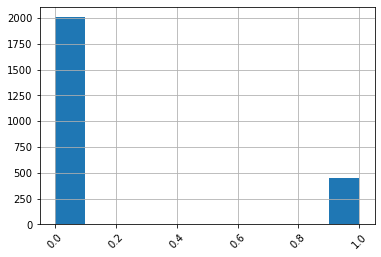

In [71]:
cbb_cleaned_2['SUCCESSFUL'].hist(xrot=45.0)

In [72]:
#largely unbalanced- will play part in the value of differnt metrics

In [15]:
# next will use pairplot to compare features that are more general metrics instead of focused metrics

In [16]:
import seaborn as sns


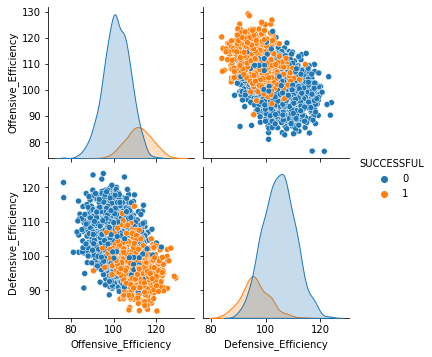

In [36]:
sns.pairplot(cbb_cleaned_2[['Offensive_Efficiency','Defensive_Efficiency','SUCCESSFUL']], hue = 'SUCCESSFUL')

In [37]:
#Observations of above
# Offensive_Efficiency(ability of offense to produce points)initially looks to play a larger role than defensive efficiency in terms of success of the team(TARGET)


In [20]:
cbb_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Offensive_Efficiency   2455 non-null   float64
 1   Defensive_Efficiency   2455 non-null   float64
 2   EFG_O                  2455 non-null   float64
 3   EFG_D                  2455 non-null   float64
 4   Turnover_Rate          2455 non-null   float64
 5   Steal_Rate             2455 non-null   float64
 6   OffensiveRebound_Rate  2455 non-null   float64
 7   DefensiveRebound_Rate  2455 non-null   float64
 8   FreeThrowRate          2455 non-null   float64
 9   FreeThrowRate_Allowed  2455 non-null   float64
 10  2P_O                   2455 non-null   float64
 11  2P_D                   2455 non-null   float64
 12  3P_O                   2455 non-null   float64
 13  3P_D                   2455 non-null   float64
 14  Tempo                  2455 non-null   float64
 15  SUCC

In [21]:
# the following pairplot looks to observe the relationship between more specific offensive features as well as overall offensive officiency compared to the success of the team


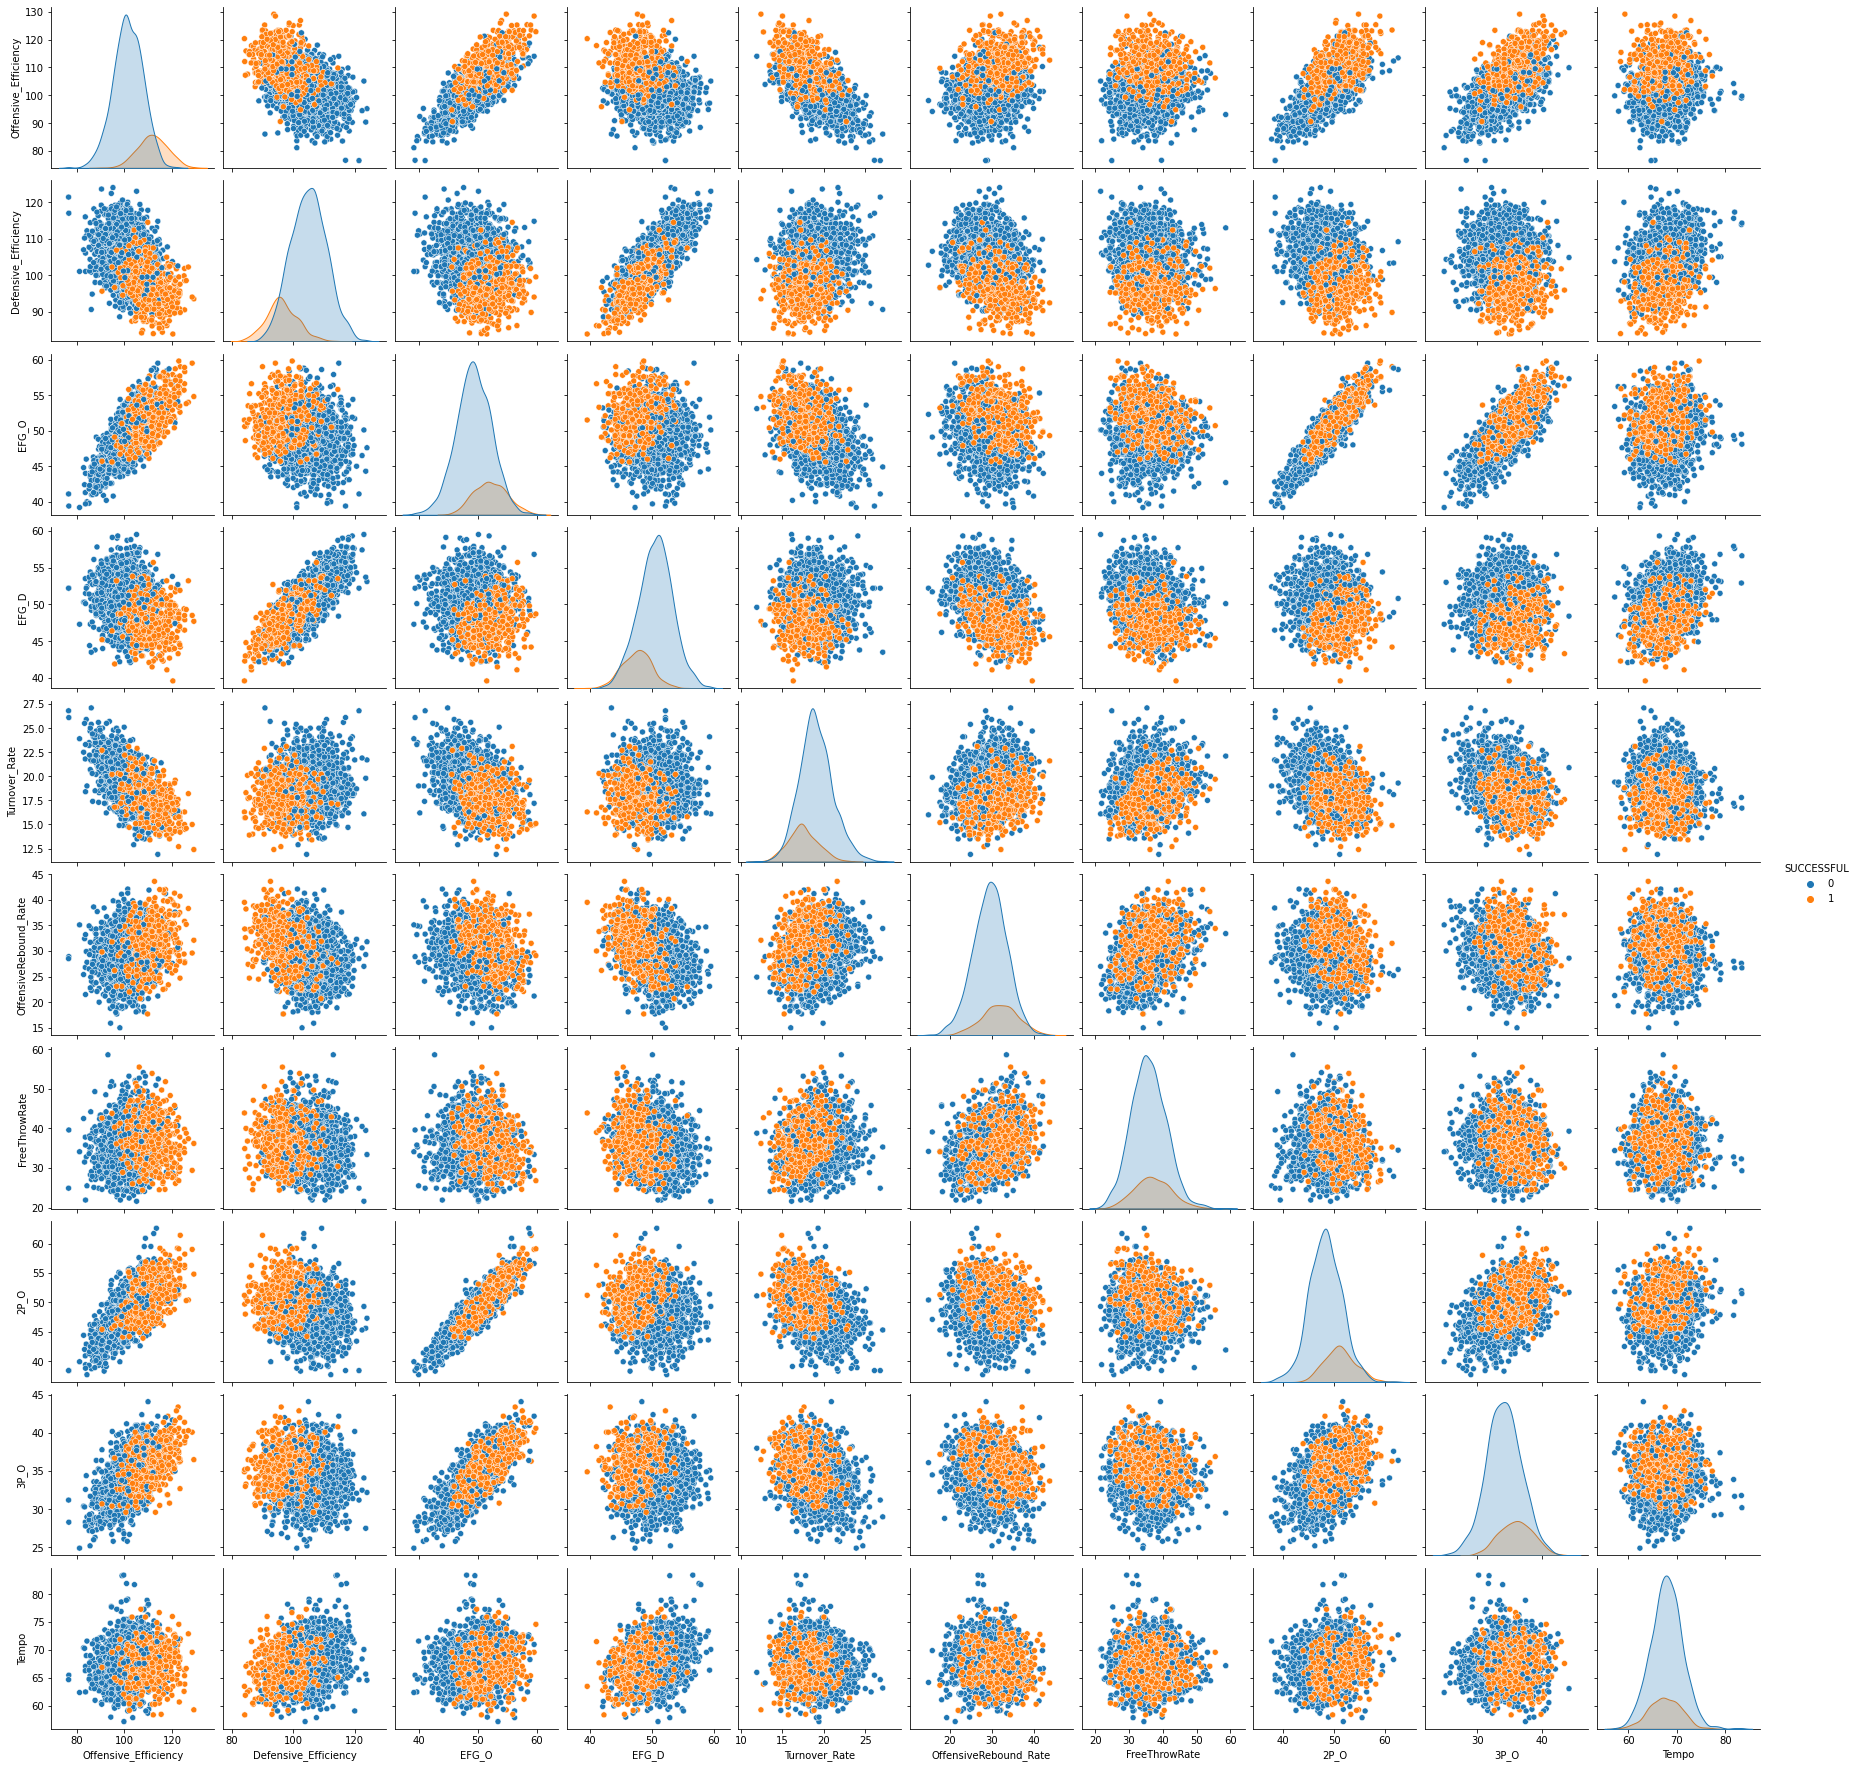

In [22]:
sns.pairplot(cbb_cleaned_2[['Offensive_Efficiency','Defensive_Efficiency','EFG_O','EFG_D','Turnover_Rate','OffensiveRebound_Rate','FreeThrowRate','2P_O','3P_O','Tempo','SUCCESSFUL']], hue = 'SUCCESSFUL')

In [23]:
# looking to drop the Offensive_Efficiency, Defensive_Efficiency, and EFG_O features due to Multicollinearity


In [73]:
cbb_cleansing_done = cbb_cleaned_2.drop(['Offensive_Efficiency','Defensive_Efficiency','EFG_O'], axis = 1)

In [74]:
#the following is trimming the data due to outliers from above pairplot

In [75]:
cbb_trimmed_tempo = cbb_cleansing_done[cbb_cleansing_done['Tempo']<75]
cbb_trimmed_tempo_turnover = cbb_trimmed_tempo[cbb_trimmed_tempo['Turnover_Rate']<25]
cbb_trimmed_tempo_turnover_3PO = cbb_trimmed_tempo_turnover[cbb_trimmed_tempo_turnover['3P_O']>27]
cbb_final = cbb_trimmed_tempo_turnover_3PO



In [76]:
cbb_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391 entries, 0 to 2454
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EFG_D                  2391 non-null   float64
 1   Turnover_Rate          2391 non-null   float64
 2   Steal_Rate             2391 non-null   float64
 3   OffensiveRebound_Rate  2391 non-null   float64
 4   DefensiveRebound_Rate  2391 non-null   float64
 5   FreeThrowRate          2391 non-null   float64
 6   FreeThrowRate_Allowed  2391 non-null   float64
 7   2P_O                   2391 non-null   float64
 8   2P_D                   2391 non-null   float64
 9   3P_O                   2391 non-null   float64
 10  3P_D                   2391 non-null   float64
 11  Tempo                  2391 non-null   float64
 12  SUCCESSFUL             2391 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 261.5 KB


In [77]:
cbb_final.corr()['SUCCESSFUL'].sort_values(ascending=False)

SUCCESSFUL               1.000000
2P_O                     0.330370
3P_O                     0.259006
OffensiveRebound_Rate    0.228658
FreeThrowRate            0.096588
Steal_Rate               0.080842
Tempo                   -0.038567
DefensiveRebound_Rate   -0.163803
FreeThrowRate_Allowed   -0.219834
3P_D                    -0.280834
Turnover_Rate           -0.293378
2P_D                    -0.364199
EFG_D                   -0.392788
Name: SUCCESSFUL, dtype: float64

In [78]:
#the negative correlation values are features that are better for the team when lower....not sure how it will 
#impact model

In [79]:
# top 3 correlated to team success
# 2 Point percentage on offense
# 3 Point percentage on offense
# Offensive Rebound Rate


In [80]:
cbb_final.corr()['SUCCESSFUL'].sort_values(ascending=False)

SUCCESSFUL               1.000000
2P_O                     0.330370
3P_O                     0.259006
OffensiveRebound_Rate    0.228658
FreeThrowRate            0.096588
Steal_Rate               0.080842
Tempo                   -0.038567
DefensiveRebound_Rate   -0.163803
FreeThrowRate_Allowed   -0.219834
3P_D                    -0.280834
Turnover_Rate           -0.293378
2P_D                    -0.364199
EFG_D                   -0.392788
Name: SUCCESSFUL, dtype: float64

In [81]:
X = cbb_final.drop('SUCCESSFUL', axis=1)
y = cbb_final['SUCCESSFUL']

In [82]:
X.head()

,EFG_D,Turnover_Rate,Steal_Rate,OffensiveRebound_Rate,DefensiveRebound_Rate,FreeThrowRate,FreeThrowRate_Allowed,2P_O,2P_D,3P_O,3P_D,Tempo
0,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7
1,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3
2,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9
3,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5
4,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [84]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [152]:
y_pred_log = logmodel.predict(X_test)


In [153]:
confusion_matrix(y_test,y_pred_log)

array([[391,  13],
       [ 39,  36]], dtype=int64)

In [154]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       404
           1       0.73      0.48      0.58        75

    accuracy                           0.89       479
   macro avg       0.82      0.72      0.76       479
weighted avg       0.88      0.89      0.88       479



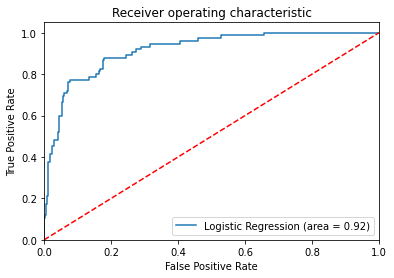

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

log_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [90]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [91]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred_rfc = rfc.predict(X_test)


In [95]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

[[393  11]
 [ 47  28]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       404
           1       0.72      0.37      0.49        75

    accuracy                           0.88       479
   macro avg       0.81      0.67      0.71       479
weighted avg       0.87      0.88      0.86       479



In [96]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_rfc))

ROC AUC:  0.673052805280528


In [97]:
from sklearn import tree

In [98]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [99]:
y_pred_dt = dt_model.predict(X_test)

In [100]:
confusion_matrix(y_test,y_pred_dt)

array([[392,  12],
       [ 56,  19]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       404
           1       0.61      0.25      0.36        75

    accuracy                           0.86       479
   macro avg       0.74      0.61      0.64       479
weighted avg       0.83      0.86      0.83       479



In [102]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_dt))

ROC AUC:  0.6118151815181518


In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [157]:
X_train_rescaled, X_test_rescaled, y_train_rescaled, y_test_rescaled = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [158]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train_rescaled, y_train_rescaled)

y_pred_knn = knn.predict(X_test_rescaled)

print(classification_report(y_test_rescaled,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       602
           1       0.62      0.22      0.33       116

    accuracy                           0.85       718
   macro avg       0.74      0.60      0.62       718
weighted avg       0.83      0.85      0.82       718



In [159]:
print('ROC AUC: ', roc_auc_score(y_test_rescaled,y_pred_knn))

ROC AUC:  0.5987799289723909


In [160]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())


<AxesSubplot:>

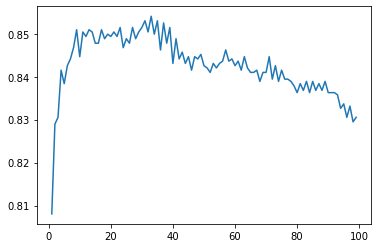

In [161]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [162]:
print ('Max value ROC_AUC: ', max(cv_scores), 'Optimal k: ', cv_scores.index(max(cv_scores))+1)

Max value ROC_AUC:  0.8540798053394939 Optimal k:  33


In [110]:
from sklearn.neural_network import MLPClassifier


In [112]:
MLPC_model = MLPClassifier(hidden_layer_sizes=45, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[396   8]
 [ 42  33]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       404
           1       0.80      0.44      0.57        75

    accuracy                           0.90       479
   macro avg       0.85      0.71      0.75       479
weighted avg       0.89      0.90      0.88       479



In [113]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc))

ROC AUC:  0.7100990099009901


In [115]:
min_hidden_layer_size = 10
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='relu', solver='adam', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

C:\Users\jacks\Downloads\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacks\Downloads\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacks\Downloads\Anaconda\li

In [116]:
print('Max value ROC AUC: ', max(cv_scores), ' Optimal Node: ' , cv_scores.index(max(cv_scores))+1)

Max value ROC AUC:  0.9252542624633329  Optimal Node:  10


In [ ]:
#Feature Importance Evaluation

In [117]:
!pip install eli5

In [118]:
import eli5
from eli5.sklearn import PermutationImportance

In [163]:
perm = PermutationImportance(logmodel, random_state=1, scoring='roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1431 ± 0.0183,EFG_D
0.0591 ± 0.0347,Turnover_Rate
0.0348 ± 0.0158,2P_O
0.0266 ± 0.0123,OffensiveRebound_Rate
0.0265 ± 0.0127,Steal_Rate
0.0257 ± 0.0166,3P_O
0.0237 ± 0.0046,FreeThrowRate_Allowed
0.0117 ± 0.0026,FreeThrowRate
0.0064 ± 0.0053,DefensiveRebound_Rate
0.0023 ± 0.0030,2P_D


<AxesSubplot:>

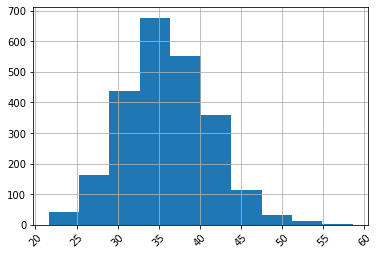

In [120]:
cbb_final['FreeThrowRate'].hist(xrot=45.0)

In [121]:
freethrow_bins = [20, 30, 40, 50, 60]


In [123]:
freethrowsummary = cbb_final.groupby(pd.cut(cbb_final['FreeThrowRate'], bins=freethrow_bins))['SUCCESSFUL'].agg(['mean', 'size'])

In [124]:
freethrowsummary.reset_index(inplace=True)

In [126]:
import matplotlib.pyplot as plt


<BarContainer object of 4 artists>

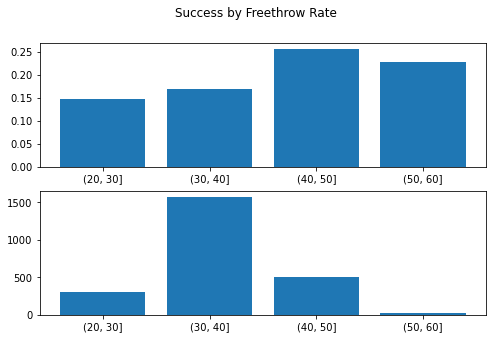

In [130]:
fig2, axs2 = plt.subplots(2, figsize=(8,5))

fig2.suptitle('Success by Freethrow Rate')
axs2[0].bar(freethrowsummary.FreeThrowRate.astype('str'), freethrowsummary['mean'])
axs2[1].bar(freethrowsummary.FreeThrowRate.astype('str'), freethrowsummary['size'])

In [ ]:
#if you reach a free throw rate of 40 minimum youn will have a much better chance of reaching the Tournament

<AxesSubplot:>

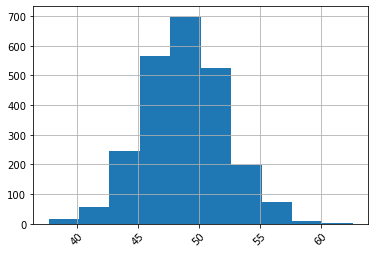

In [131]:
cbb_final['2P_O'].hist(xrot=45.0)

In [134]:
twopoint_bins = [40, 45, 50, 55, 60]


In [135]:
twopointsummary = cbb_final.groupby(pd.cut(cbb_final['2P_O'], bins=twopoint_bins))['SUCCESSFUL'].agg(['mean', 'size'])

In [136]:
twopointsummary.reset_index(inplace=True)

In [142]:
twopointsummary

,2P_O,mean,size
0,"(40, 45]",0.013937,287
1,"(45, 50]",0.125496,1259
2,"(50, 55]",0.310811,740
3,"(55, 60]",0.574713,87


<BarContainer object of 4 artists>

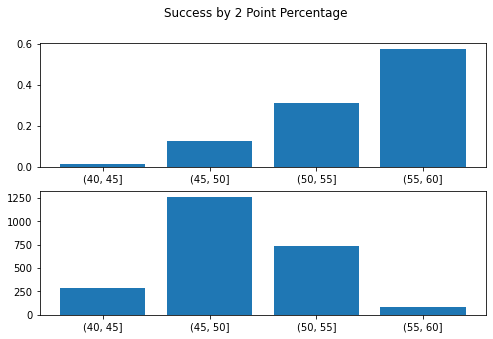

In [145]:
fig2, axs2 = plt.subplots(2, figsize=(8,5))

fig2.suptitle('Success by 2 Point Percentage')
axs2[0].bar(twopointsummary['2P_O'].astype('str'), twopointsummary['mean'])
axs2[1].bar(twopointsummary['2P_O'].astype('str'), twopointsummary['size'])